In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
df=pd.read_csv('C:/Users/HMC/Documents/UM/customer satisfaction/customer_support_tickets.csv')
print(df.head(5))
df.info()
des=df.describe(include='all')
print(des)

   Ticket ID    Customer Name            Customer Email        Customer Age  \
0      1            Marisa Obrien  carrollallison@example.com       32        
1      2             Jessica Rios    clarkeashley@example.com       42        
2      3      Christopher Robbins   gonzalestracy@example.com       48        
3      4         Christina Dillon    bradleyolson@example.org       27        
4      5        Alexander Carroll     bradleymark@example.com       67        

  Customer Gender Product Purchased Date of Purchase   Ticket Type     \
0       Other            GoPro Hero    2021-03-22     Technical issue   
1      Female           LG Smart TV    2021-05-22     Technical issue   
2       Other              Dell XPS    2020-07-14     Technical issue   
3      Female      Microsoft Office    2020-11-13     Billing inquiry   
4      Female      Autodesk AutoCAD    2020-02-04     Billing inquiry   

        Ticket Subject       \
0             Product setup   
1  Peripheral compatibil

In [90]:
m=df.isnull().sum()
print(m)

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64


In [91]:
n=df.isna().sum()
print(n)

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64


# Analysis of Numerical Variables

In [92]:
numerical_feature=[feature for feature in df.columns if df[feature].dtypes!='object']
print(numerical_feature)

['Ticket ID', 'Customer Age', 'Customer Satisfaction Rating']


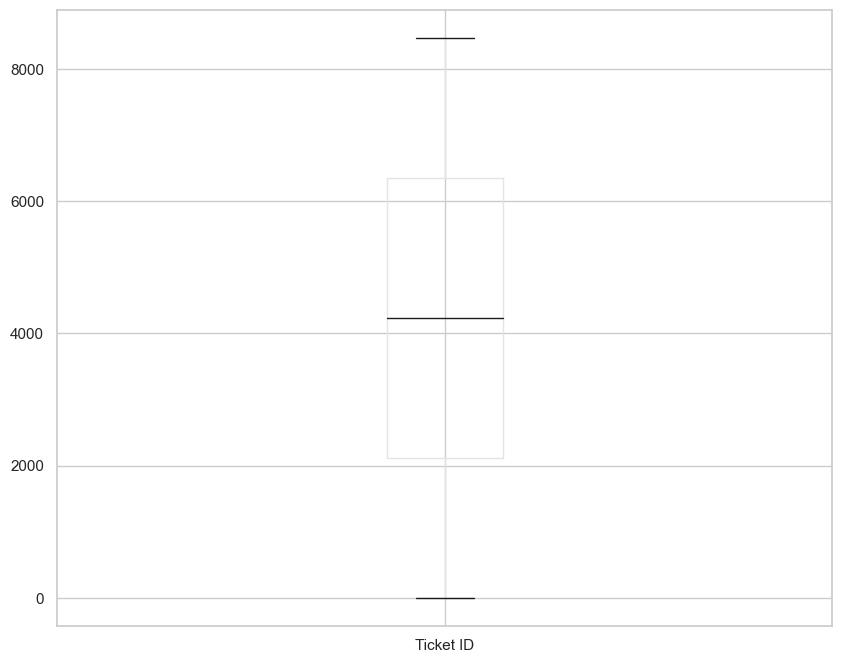

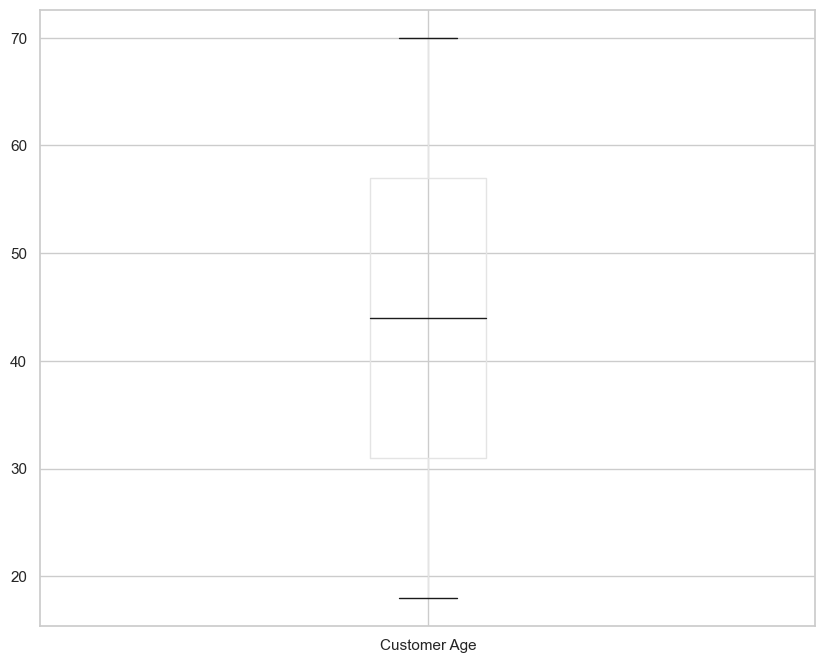

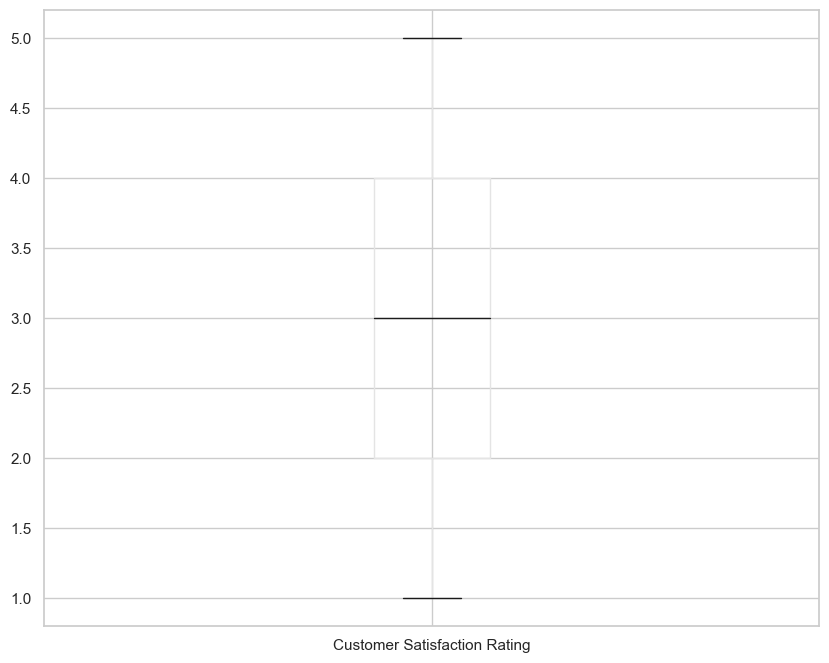

In [93]:
for i in numerical_feature:
    df.boxplot(column=i,figsize=(10,8))
    plt.xticks(rotation=0)
    plt.show()

In [94]:
mean_val=df['Customer Satisfaction Rating'].mean()
df['Customer Satisfaction Rating_nan']=np.where(df['Customer Satisfaction Rating'].isnull(),1,0)
df['Customer Satisfaction Rating'].fillna('Missing',inplace=True)
print(df[numerical_feature].isnull().sum())

Ticket ID                       0
Customer Age                    0
Customer Satisfaction Rating    0
dtype: int64


# Analysis of Categorical Variables

In [95]:
categorical_feature=[feature for feature in df.columns if df[feature].dtypes=='object']
feature_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='object']
df[feature_nan]=df[feature_nan].fillna('Missing')
print(df[categorical_feature].isnull().sum())

Customer Name                   0
Customer Email                  0
Customer Gender                 0
Product Purchased               0
Date of Purchase                0
Ticket Type                     0
Ticket Subject                  0
Ticket Description              0
Ticket Status                   0
Resolution                      0
Ticket Priority                 0
Ticket Channel                  0
First Response Time             0
Time to Resolution              0
Customer Satisfaction Rating    0
dtype: int64


# Product Purchased

     Product Purchased     Count
0         Adobe Photoshop   181 
1             Amazon Echo   221 
2           Amazon Kindle   198 
3           Apple AirPods   213 
4                Asus ROG   187 
5        Autodesk AutoCAD   196 
6       Bose QuietComfort   190 
7  Bose SoundLink Speaker   197 
8       Canon DSLR Camera   206 
9               Canon EOS   240 


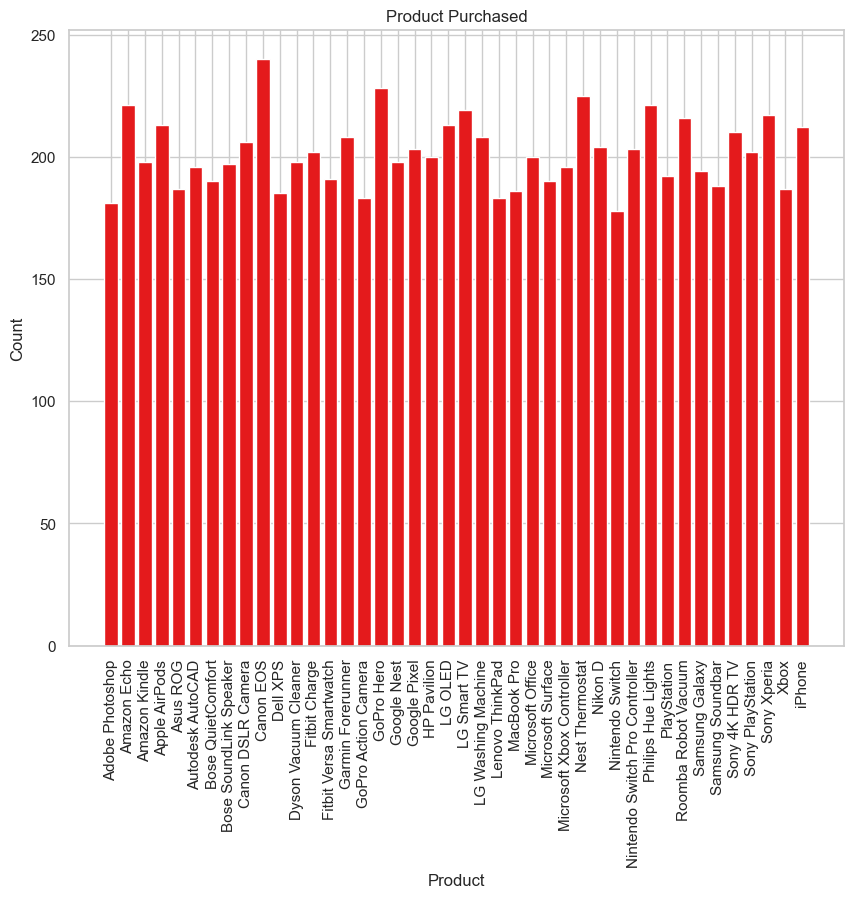

In [96]:
data=df.copy()
data=data.groupby('Product Purchased')['Ticket ID'].count().reset_index()
data=data.rename(columns={'Ticket ID':'Count'})
print(data.head(10))

plt.figure(figsize=(10,8))
plt.bar(data['Product Purchased'],data['Count'])
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Product Purchased')
plt.xticks(rotation=90)
plt.show()


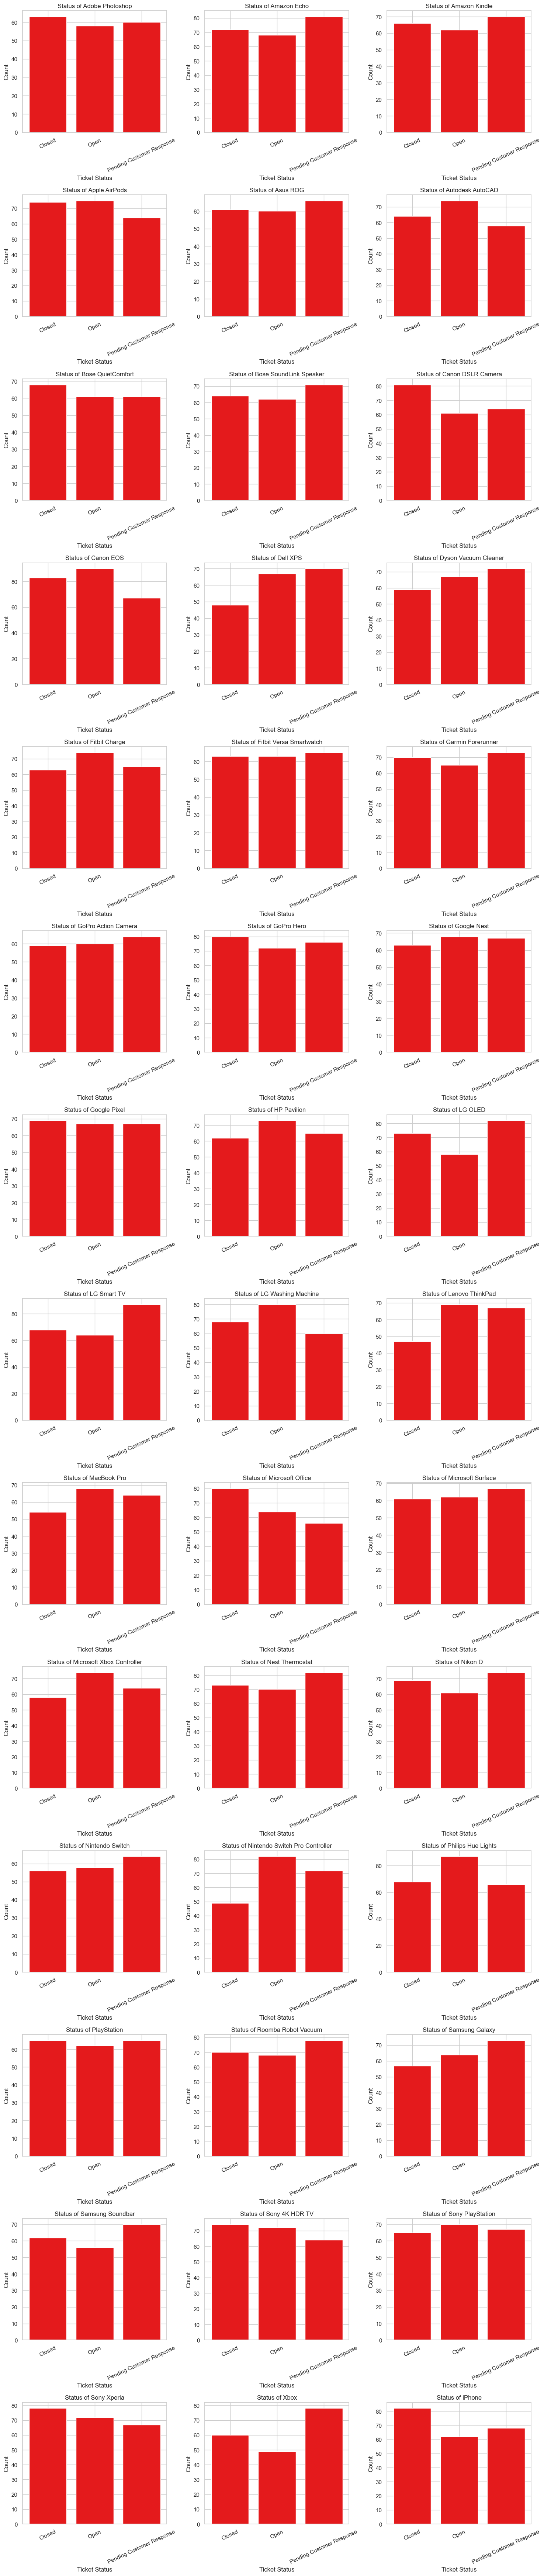

In [97]:
import math

data=df.copy()
data=data.groupby(['Product Purchased','Ticket Status'])['Ticket ID'].count().reset_index()
prod=data['Product Purchased'].unique()
ncols=3
nrows=math.ceil(len(prod)/ncols)

fig,axes=plt.subplots(nrows,ncols,figsize=(15,5*nrows),sharex=False,sharey=False)
axes=axes.flatten()

for i,product in enumerate(prod):
    ax=axes[i]
    d=data[data['Product Purchased']==product]
    ax.bar(d['Ticket Status'],d['Ticket ID'])
    ax.set_xlabel('Ticket Status')
    ax.set_ylabel('Count')
    ax.set_title(f"Status of {product}")
    ax.tick_params(axis='x',rotation=25)

plt.tight_layout()
plt.show()



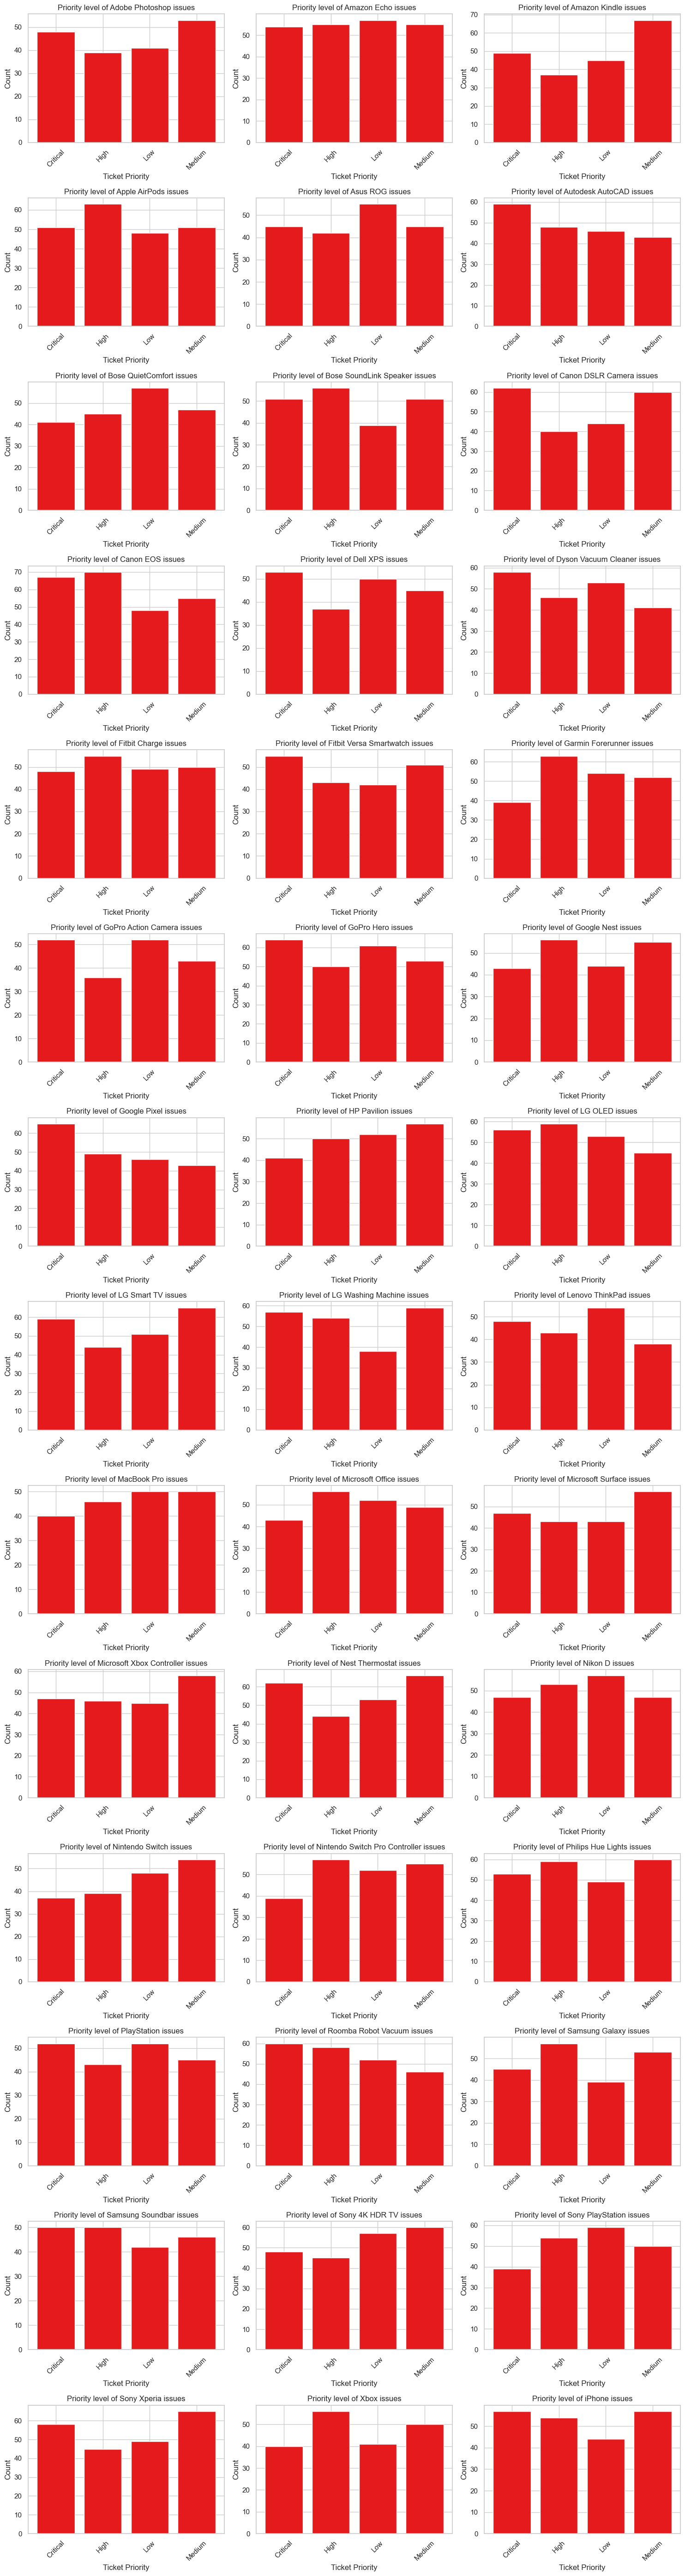

In [98]:
import math

data=df.copy()
data=data.groupby(['Product Purchased','Ticket Priority'])['Ticket ID'].count().reset_index()
prod=data['Product Purchased'].unique()
ncols=3
nrows=math.ceil(len(prod)/ncols)

fig,axes=plt.subplots(nrows,ncols,figsize=(15,4*nrows),sharex=False,sharey=False)
axes=axes.flatten()

for i,product in enumerate(prod):
    ax=axes[i]
    d=data[data['Product Purchased']==product]
    ax.bar(d['Ticket Priority'],d['Ticket ID'])
    ax.set_xlabel('Ticket Priority')
    ax.set_ylabel('Count')
    ax.set_title(f"Priority level of {product} issues")
    ax.tick_params(axis='x',rotation=45)

plt.tight_layout()
plt.show()



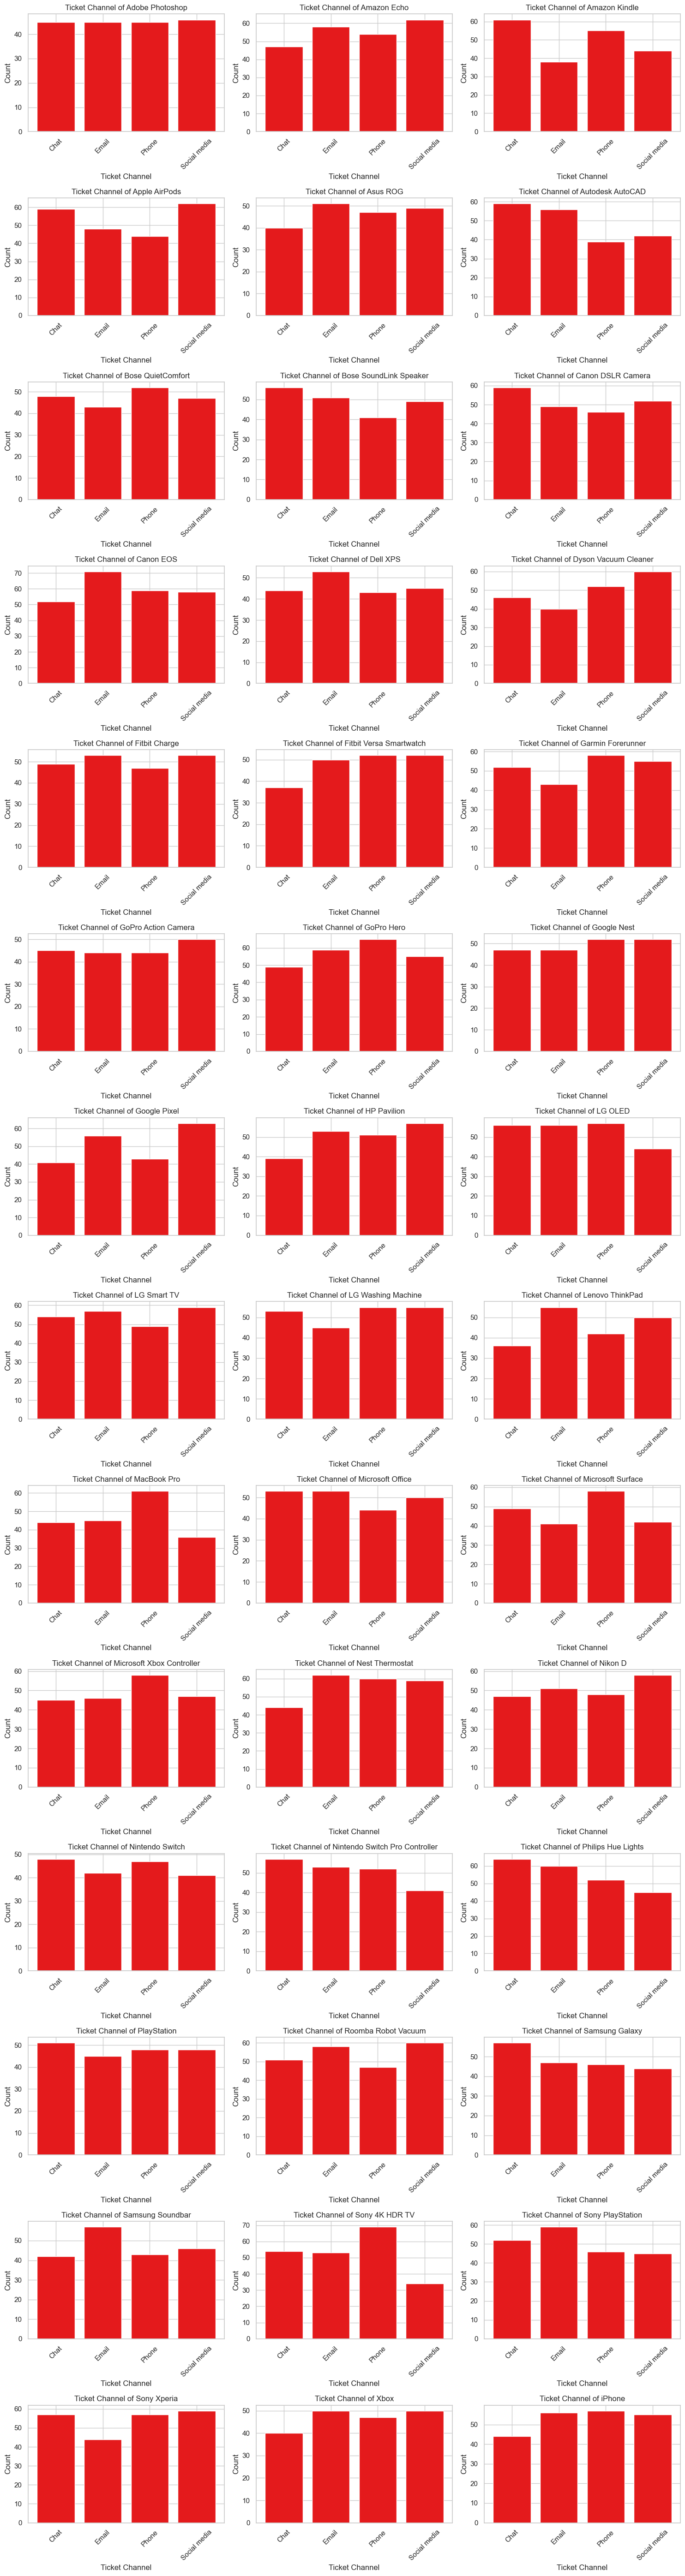

In [99]:
import math

data=df.copy()
data=data.groupby(['Product Purchased','Ticket Channel'])['Ticket ID'].count().reset_index()
prod=data['Product Purchased'].unique()
ncols=3
nrows=math.ceil(len(prod)/ncols)

fig,axes=plt.subplots(nrows,ncols,figsize=(15,4*nrows),sharex=False,sharey=False)
axes=axes.flatten()

for i,product in enumerate(prod):
    ax=axes[i]
    d=data[data['Product Purchased']==product]
    ax.bar(d['Ticket Channel'],d['Ticket ID'])
    ax.set_xlabel('Ticket Channel')
    ax.set_ylabel('Count')
    ax.set_title(f"Ticket Channel of {product}")
    ax.tick_params(axis='x',rotation=45)

plt.tight_layout()
plt.show()



In [115]:
data=df.copy()
m=data[data['Customer Satisfaction Rating'].isin(['Missing'])]
missing=m.groupby('Product Purchased')['Ticket ID'].count().reset_index()
missing=missing.rename(columns={'Ticket ID':'Missing in Rating'})
print(missing)

unresolved=data[data['Ticket Status'].isin(['Open','Pending Customer Response'])]
new=unresolved.groupby('Product Purchased')['Ticket ID'].count().reset_index()
new=new.rename(columns={'Ticket ID':'Unresolved Cases'})
print(new)

dataf=pd.merge(new,missing,on='Product Purchased')
print(dataf)


          Product Purchased         Missing in Rating
0                  Adobe Photoshop         118       
1                      Amazon Echo         149       
2                    Amazon Kindle         132       
3                    Apple AirPods         139       
4                         Asus ROG         126       
5                 Autodesk AutoCAD         132       
6                Bose QuietComfort         122       
7           Bose SoundLink Speaker         133       
8                Canon DSLR Camera         125       
9                        Canon EOS         157       
10                        Dell XPS         137       
11            Dyson Vacuum Cleaner         139       
12                   Fitbit Charge         139       
13         Fitbit Versa Smartwatch         128       
14               Garmin Forerunner         138       
15             GoPro Action Camera         124       
16                      GoPro Hero         148       
17                     Googl

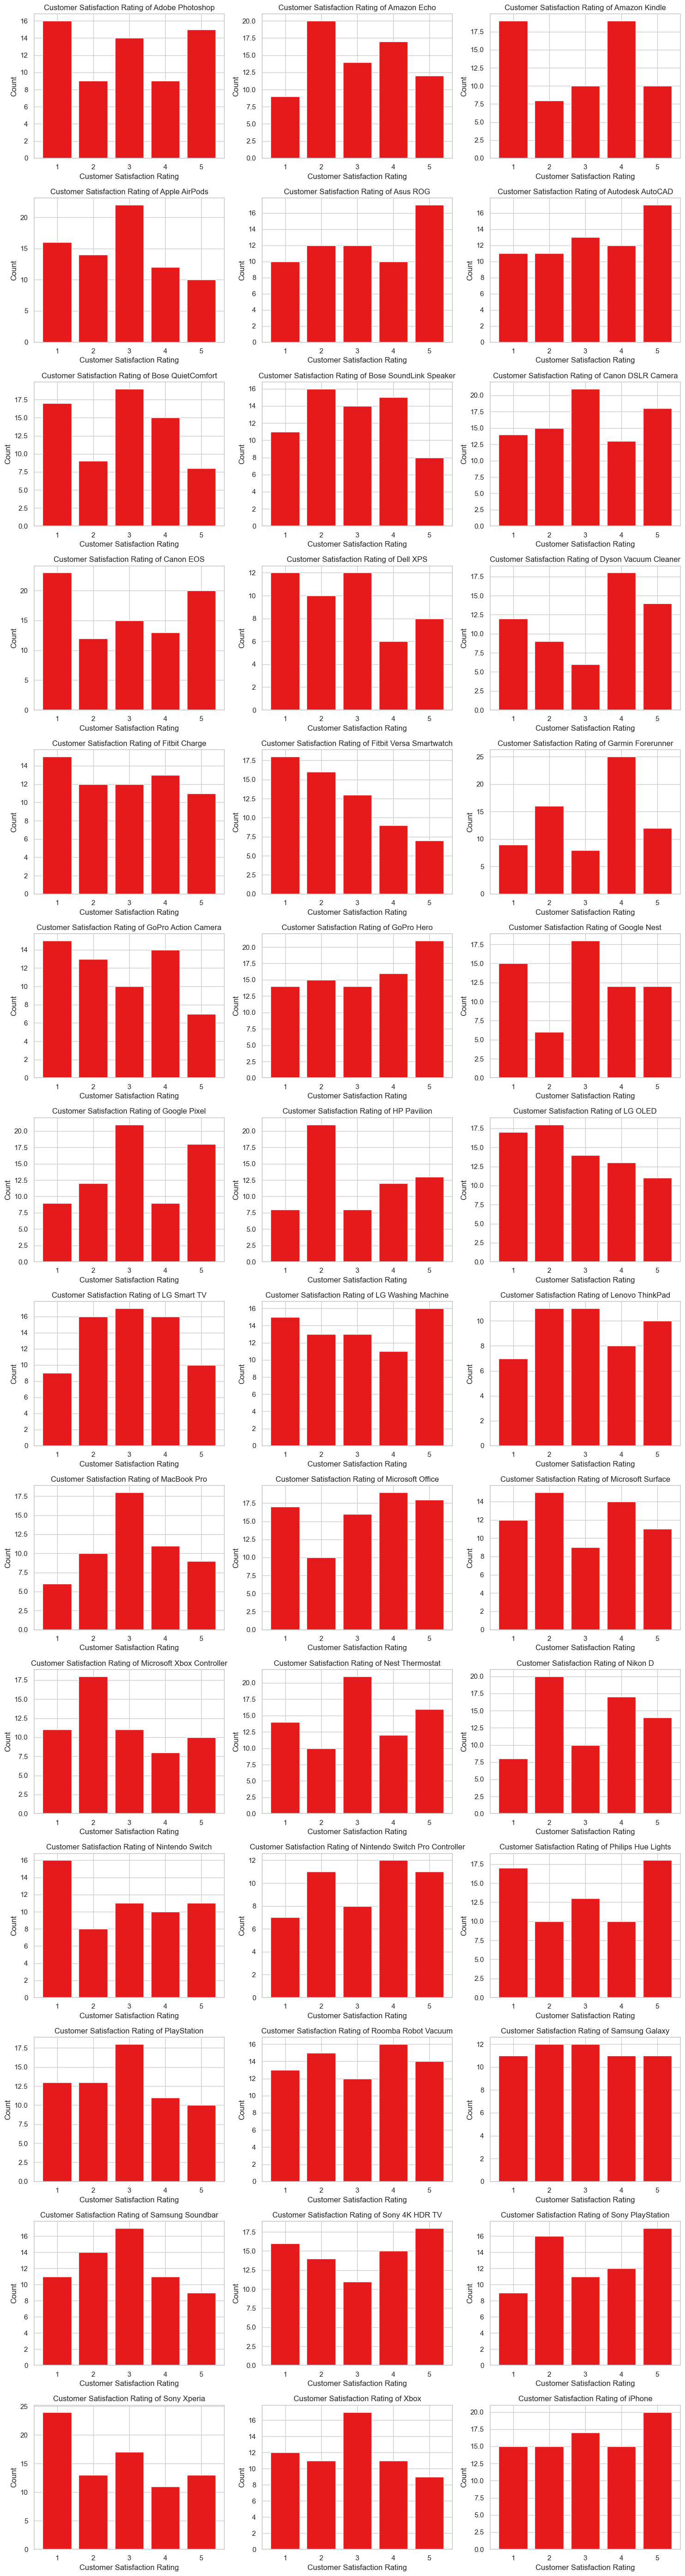

In [101]:
import math

data=df.copy()
data = data[data['Customer Satisfaction Rating'] != 'Missing']
data=data.groupby(['Product Purchased','Customer Satisfaction Rating'])['Ticket ID'].count().reset_index()
prod=data['Product Purchased'].unique()
ncols=3
nrows=math.ceil(len(prod)/ncols)

fig,axes=plt.subplots(nrows,ncols,figsize=(15,4*nrows),sharex=False,sharey=False)
axes=axes.flatten()

for i,product in enumerate(prod):
    ax=axes[i]
    d=data[data['Product Purchased']==product]
    ax.bar(d['Customer Satisfaction Rating'],d['Ticket ID'])
    ax.set_xlabel('Customer Satisfaction Rating')
    ax.set_ylabel('Count')
    ax.set_title(f"Customer Satisfaction Rating of {product}")

plt.tight_layout()
plt.show()


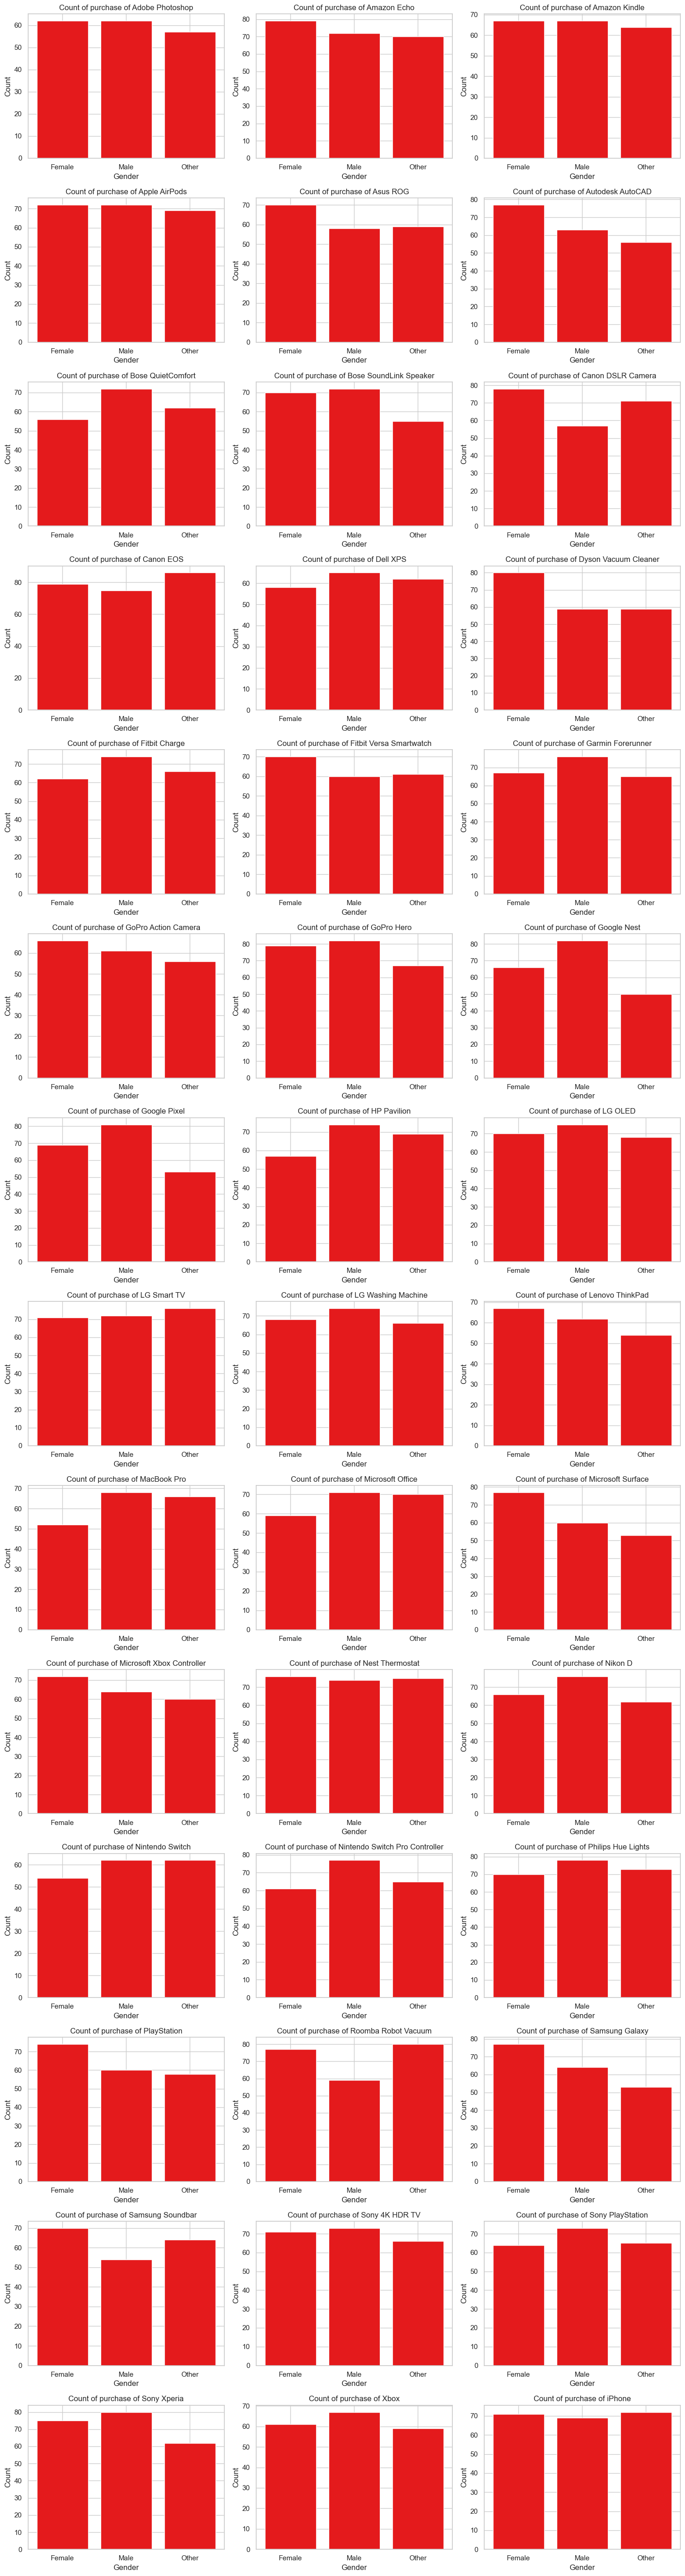

In [117]:
data=df.copy()
data=data.groupby(['Product Purchased','Customer Gender'])['Ticket ID'].count().reset_index()

prod=data['Product Purchased'].unique()
ncols=3
nrows=math.ceil(len(prod)/ncols)

fig,axes=plt.subplots(nrows,ncols,figsize=(15,4*nrows),sharex=False,sharey=False)
axes=axes.flatten()

for i,product in enumerate(prod):
    ax=axes[i]
    d=data[data['Product Purchased']==product]
    ax.bar(d['Customer Gender'],d['Ticket ID'])
    ax.set_xlabel('Gender')
    ax.set_ylabel('Count')
    ax.set_title(f"Count of purchase of {product}")

plt.tight_layout()
plt.show()

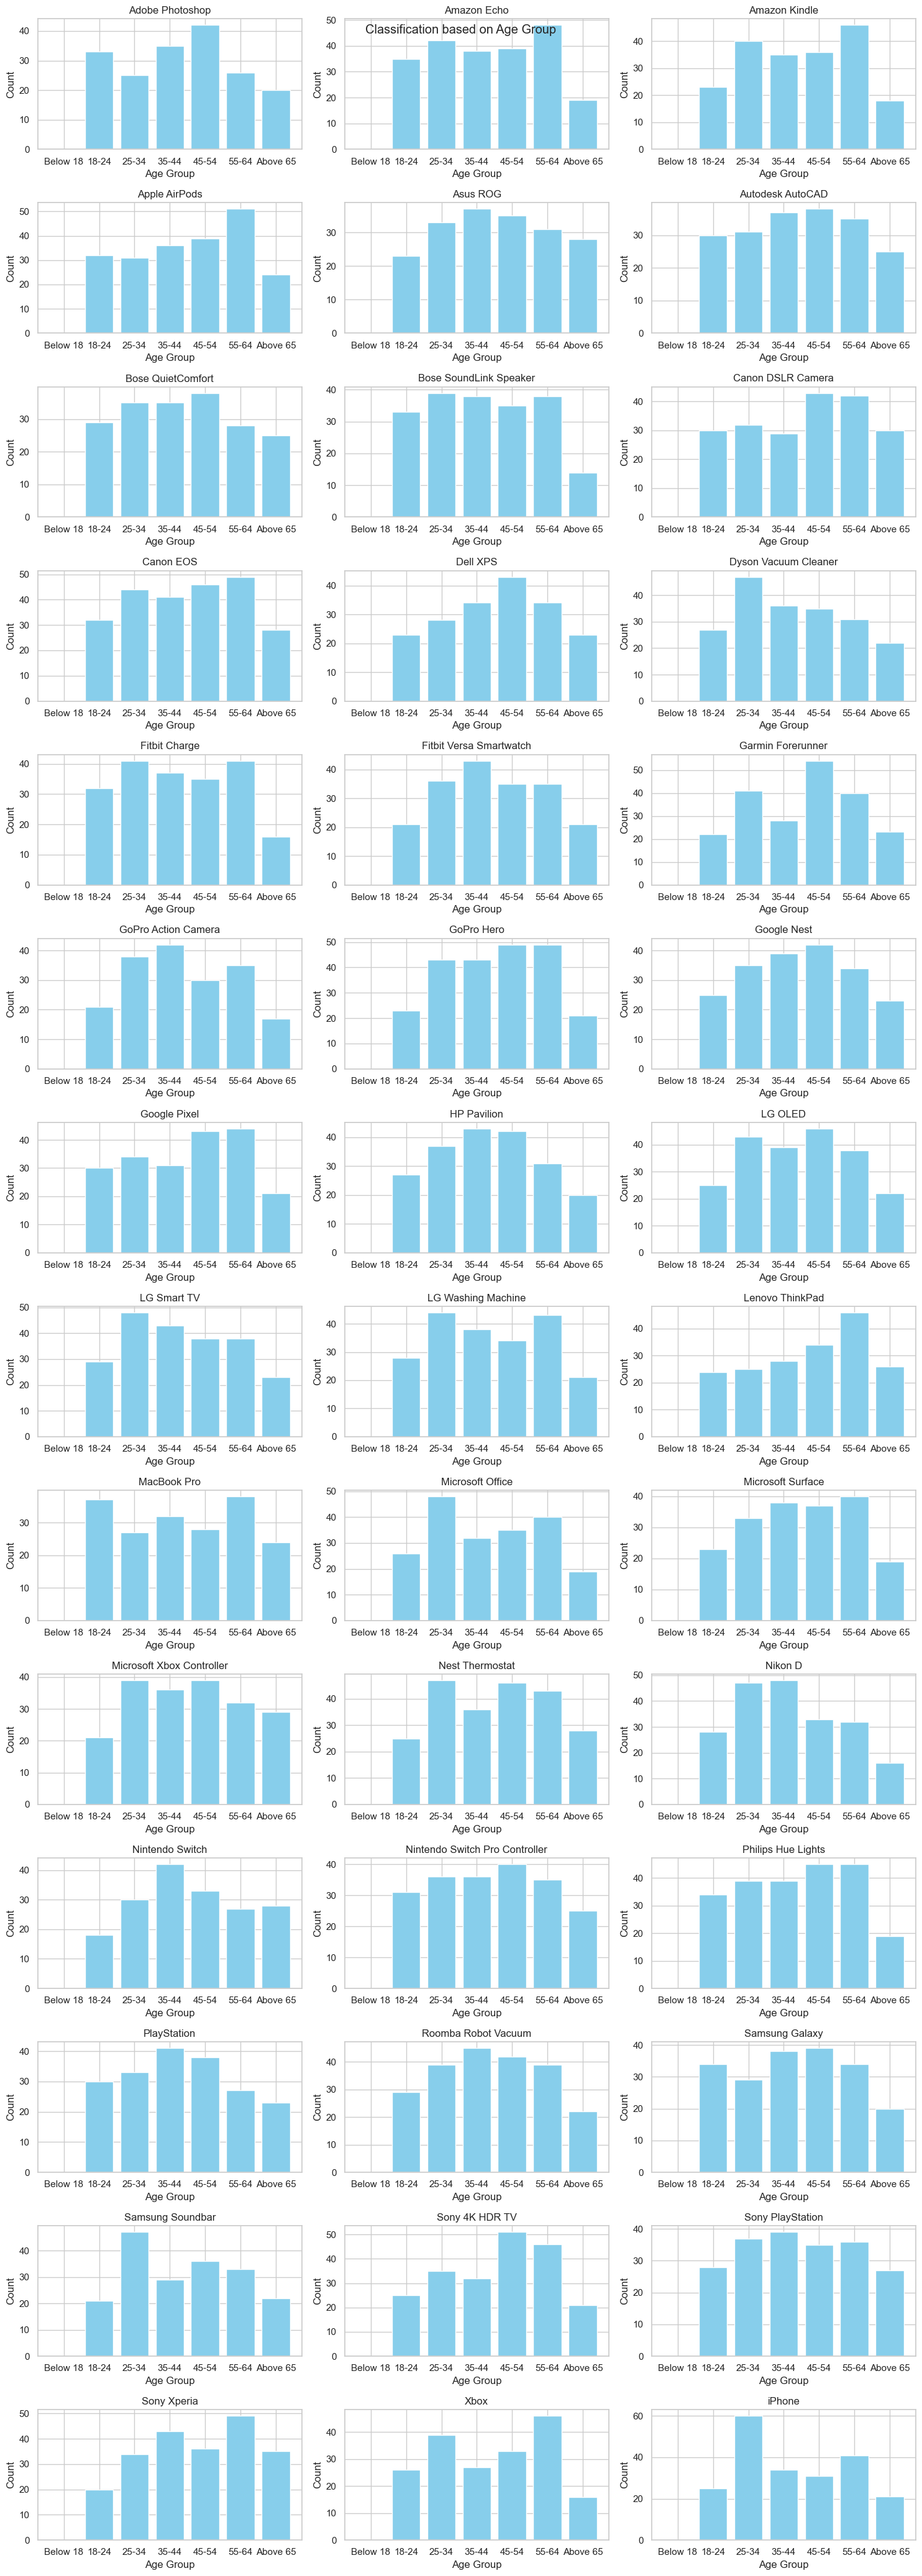

In [127]:
data=df.copy()
bin=[0, 18, 25, 35, 45, 55, 65,np.inf]
label=['Below 18','18-24', '25-34', '35-44', '45-54', '55-64','Above 65']
data['Age Group']=pd.cut(data['Customer Age'],bins=bin,labels=label,right=False)
data=data.groupby(['Product Purchased','Age Group'])['Ticket ID'].count().reset_index()

prod=data['Product Purchased'].unique()
ncols=3
nrows=math.ceil(len(prod)/ncols)
fig,axes=plt.subplots(nrows,ncols,figsize=(15,3*nrows),sharex=False,sharey=False)
axes=axes.flatten()

for i,product in enumerate(prod):
    ax=axes[i]
    d=data[data['Product Purchased']==product]
    ax.bar(d['Age Group'],d['Ticket ID'],color='skyblue')
    ax.set_xlabel('Age Group')
    ax.set_ylabel('Count')
    ax.set_title(f"{product}")

fig.suptitle('Classification based on Age Group')
plt.tight_layout()
plt.show()

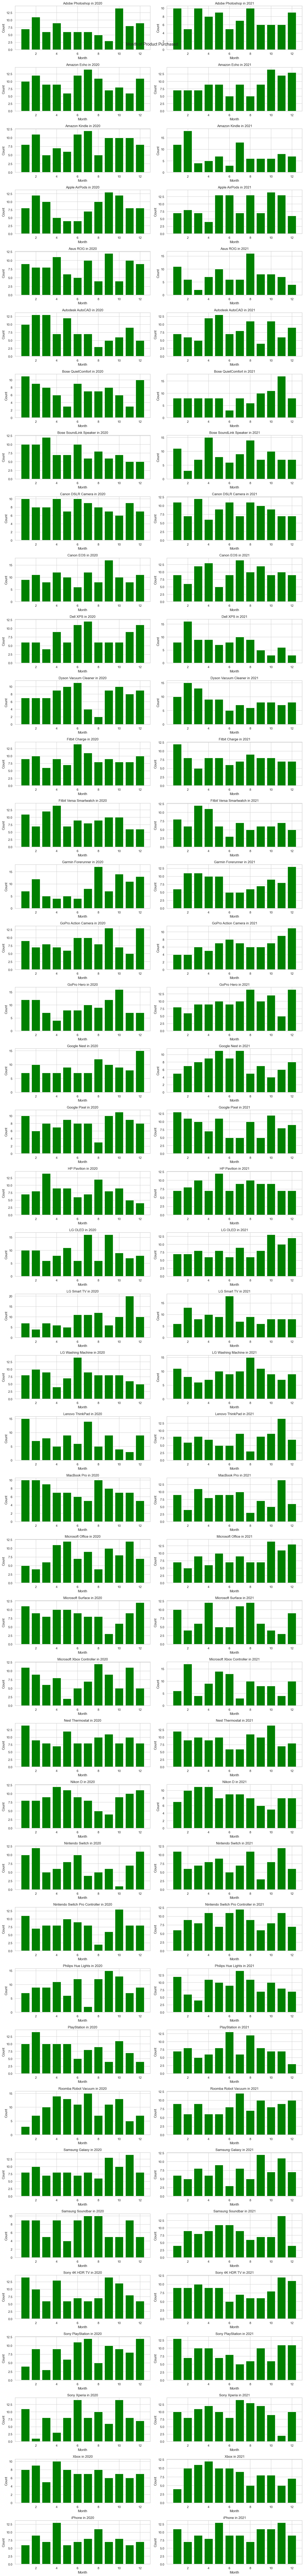

In [140]:
data=df.copy()
data['Date of Purchase']=pd.to_datetime(data['Date of Purchase'])
data['Month of Purchase']=data['Date of Purchase'].dt.month
data['Year of Purchase']=data['Date of Purchase'].dt.year
data=data.groupby(['Product Purchased','Year of Purchase','Month of Purchase'])['Ticket ID'].count().reset_index()

prod_years = data[['Product Purchased','Year of Purchase']].drop_duplicates().values
ncols=2
nrows=math.ceil(len(prod_years)/ncols)

fig,axes=plt.subplots(nrows,ncols,figsize=(15,3*nrows),sharey=False,sharex=False)
axes=axes.flatten()

for i,(prod,yr) in enumerate(prod_years):
    ax=axes[i]
    d=data[(data['Product Purchased']==prod) & (data['Year of Purchase']==yr)]
    ax.bar(d['Month of Purchase'],d['Ticket ID'],color='green')
    ax.set_xlabel('Month')
    ax.set_ylabel('Count')
    ax.set_title(f"{prod} in {yr}")

fig.suptitle('Month of Product Purchased')
plt.tight_layout()
plt.show()